In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ped_data = pd.read_csv('../../data/pediatric_patients_report_drug_reaction.csv.gz',compression='gzip', index_col=0)

In [3]:
ped_data.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 881396 entries, 1 to 1754669
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_custom_master_age       881396 non-null  float64
 1   patient_custom_master_age_unit  881396 non-null  object 
 2   patient_onsetage                881396 non-null  float64
 3   patient_onsetageunit            881396 non-null  object 
 4   patient_sex                     881396 non-null  object 
 5   safetyreportid                  881396 non-null  object 
 6   nichd                           881396 non-null  object 
 7   ich_ema                         639944 non-null  object 
 8   fda                             529859 non-null  object 
 9   lastupdate_date                 881396 non-null  object 
 10  mostrecent_receive_date         881396 non-null  object 
 11  receive_date                    881396 non-null  object 
 12  congenital_anomali  

In [3]:
col = 'patient_custom_master_age'
display(ped_data[col].astype(float).dropna().shape[0])

881396

In [15]:
ped_reports = (ped_data.
               query('patient_custom_master_age>0 & patient_custom_master_age<21').
               safetyreportid.unique()
              )

In [4]:
ped_data.columns

Index(['patient_custom_master_age', 'patient_custom_master_age_unit',
       'patient_onsetage', 'patient_onsetageunit', 'patient_sex',
       'safetyreportid', 'nichd', 'ich_ema', 'fda', 'lastupdate_date',
       'mostrecent_receive_date', 'receive_date', 'congenital_anomali',
       'death', 'disabling', 'hospitalization', 'life_threatening', 'other',
       'serious', 'reporter_company', 'reporter_country',
       'reporter_qualification', 'drug_administration',
       'drug_characterization', 'drug_indication', 'medicinal_product',
       'reaction_meddrapt', 'reaction_outcome'],
      dtype='object')

a = drug(A) and Reaction(A)
b = drug(A) and Reaction(ALL)
c = drug(ALL) and Reaction(A)
d = drug(ALL) and Reaction(ALL)

PRR = a/(a+b) / c/(c+d)

ROR = a/b / c/d = a * d / b * c
ROR = odds ที่ได้รับยา / odds ที่ไม่ได้รับยา

In [13]:
sev_cols = {
    1:'other',
    2:'congenital_anomali',
    3:'disabling',
    4:'hospitalization',
    5:'life_threatening',
    6:'death'
}

df = ped_data.copy()

for col in sev_cols.values():
    df[col] = df[col].astype(int)
    
# N_{d_i-s_j,+}
paire_total = (
    df.groupby(['medicinal_product','reaction_meddrapt'])
    .size()
    .rename('N_pair_all')
    .reset_index()
)

# N_{d_i-s_j,k}
paire_k = (
    df.groupby(['medicinal_product', 'reaction_meddrapt',])[list(sev_cols.values())]
    .sum()
    .reset_index()
)

pair_df = paire_total.merge(paire_k, on=['medicinal_product', 'reaction_meddrapt'])

N_all_total = len(df) # N_{+,+} รายงานทั้งหมด (A+B+C+D)
N_all_k = {k: df[col].sum() for k, col in sev_cols.items()} # N_{+,k} dict {k: จำนวนรายงานรุนแรงชั้น k ทั้ง dataset}


In [19]:
print(f'N_all_k: {N_all_k}')
print(f'N_all_total: {N_all_total}')

N_all_k: {1: np.int64(466406), 2: np.int64(14030), 3: np.int64(41446), 4: np.int64(413919), 5: np.int64(97148), 6: np.int64(147070)}
N_all_total: 881396


In [23]:
# paire_k.loc[paire_k[sev_cols.values()].sum(axis=1) == 0]
paire_k

,medicinal_product,reaction_meddrapt,other,congenital_anomali,disabling,hospitalization,life_threatening,death
0,(ACTINOMYCIN D),ACUTE MYELOID LEUKAEMIA,1,0,0,0,0,0
1,(ACTINOMYCIN D),ENGRAFT FAILURE,1,0,0,0,0,0
2,(ACTINOMYCIN D),LYMPHADENOPATHY,0,0,0,1,0,0
3,(ACTINOMYCIN D),MALIGNANT NEOPLASM PROGRESSION,1,0,0,0,0,0
4,(ACTINOMYCIN D),MYELODYSPLASTIC SYNDROME,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
424830,^VENIAFAXINE^ ( ),DIZZINESS,1,0,0,0,0,0
424831,^VENIAFAXINE^ ( ),DYSPNOEA,1,0,0,0,0,0
424832,^VENIAFAXINE^ ( ),FEELING ABNORMAL,1,0,0,0,0,0
424833,^VENIAFAXINE^ ( ),GASTROENTERITIS VIRAL,1,0,0,0,0,0


In [17]:
pair_df

,medicinal_product,reaction_meddrapt,N_pair_all,other,congenital_anomali,disabling,hospitalization,life_threatening,death
0,(ACTINOMYCIN D),ACUTE MYELOID LEUKAEMIA,1,1,0,0,0,0,0
1,(ACTINOMYCIN D),ENGRAFT FAILURE,1,1,0,0,0,0,0
2,(ACTINOMYCIN D),LYMPHADENOPATHY,1,0,0,0,1,0,0
3,(ACTINOMYCIN D),MALIGNANT NEOPLASM PROGRESSION,1,1,0,0,0,0,0
4,(ACTINOMYCIN D),MYELODYSPLASTIC SYNDROME,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
424830,^VENIAFAXINE^ ( ),DIZZINESS,1,1,0,0,0,0,0
424831,^VENIAFAXINE^ ( ),DYSPNOEA,1,1,0,0,0,0,0
424832,^VENIAFAXINE^ ( ),FEELING ABNORMAL,1,1,0,0,0,0,0
424833,^VENIAFAXINE^ ( ),GASTROENTERITIS VIRAL,1,1,0,0,0,0,0


In [24]:
print(f'N_d_i-s_j,+: {paire_total.shape[0]}')
print(f'N_d_i-s_j,k: {paire_k.shape[0]}')
print('N_{+,+}:', N_all_total)
print('N_{+,k}:', N_all_k)

N_d_i-s_j,+: 424835
N_d_i-s_j,k: 424835
N_{+,+}: 881396
N_{+,k}: {1: np.int64(466406), 2: np.int64(14030), 3: np.int64(41446), 4: np.int64(413919), 5: np.int64(97148), 6: np.int64(147070)}


"$$",
    "{{PRR}}_{{d}_{i}-{s}_{j},k} = \\frac{{N}_{{d}_{i}-{s}_{j},k} / {N}_{{d}_{i}-{s}_{j},+}}{\\left( {N}_{+,k} - {N}_{{d}_{i}-{s}_{j},k} \\right) / \\left( {N}_{+,+} - {N}_{{d}_{i}-{s}_{j},+} \\right)}"
    "$$"

In [14]:
def prr_ci(a, b, c, d):
    if a == 0:                           
        return (0, 0, 0)
    prr = (a / (a + b)) / (c / (c + d))
    se  = np.sqrt(1/a - 1/(a+b) + 1/c - 1/(c+d))
    low = np.exp(np.log(prr) - 1.96 * se)
    up  = np.exp(np.log(prr) + 1.96 * se)
    return (prr, low, up)

records = []
for _, row in pair_df.iterrows():
    d, s, N_pair_all = row['medicinal_product'], row['reaction_meddrapt'], row['N_pair_all']
    for k, col in sev_cols.items():
        A = row[col]                          
        if A == 0:
            continue
        B = N_pair_all - A
        C = N_all_k[k] - A
        D = (N_all_total - N_pair_all) - C
        prr, low, up = prr_ci(A, B, C, D)
        records.append([d, s, k, A, prr, low, up])

prr_sev_df = pd.DataFrame(records,
                          columns=['drug','adr','sev_k','n_reports','prr','ci_low','ci_up'])

# ----- (CI_low > 1) -----
signal_df = prr_sev_df.query('ci_low > 1')

In [15]:
prr_sev_df

,drug,adr,sev_k,n_reports,prr,ci_low,ci_up
0,(ACTINOMYCIN D),ACUTE MYELOID LEUKAEMIA,1,1,1.889763,1.886045,1.893488
1,(ACTINOMYCIN D),ENGRAFT FAILURE,1,1,1.889763,1.886045,1.893488
2,(ACTINOMYCIN D),LYMPHADENOPATHY,4,1,2.129395,2.124676,2.134125
3,(ACTINOMYCIN D),MALIGNANT NEOPLASM PROGRESSION,1,1,1.889763,1.886045,1.893488
4,(ACTINOMYCIN D),MYELODYSPLASTIC SYNDROME,1,1,1.889763,1.886045,1.893488
...,...,...,...,...,...,...,...
705035,^VENIAFAXINE^ ( ),DIZZINESS,1,1,1.889763,1.886045,1.893488
705036,^VENIAFAXINE^ ( ),DYSPNOEA,1,1,1.889763,1.886045,1.893488
705037,^VENIAFAXINE^ ( ),FEELING ABNORMAL,1,1,1.889763,1.886045,1.893488
705038,^VENIAFAXINE^ ( ),GASTROENTERITIS VIRAL,1,1,1.889763,1.886045,1.893488


In [16]:
signal_df

,drug,adr,sev_k,n_reports,prr,ci_low,ci_up
0,(ACTINOMYCIN D),ACUTE MYELOID LEUKAEMIA,1,1,1.889763,1.886045,1.893488
1,(ACTINOMYCIN D),ENGRAFT FAILURE,1,1,1.889763,1.886045,1.893488
2,(ACTINOMYCIN D),LYMPHADENOPATHY,4,1,2.129395,2.124676,2.134125
3,(ACTINOMYCIN D),MALIGNANT NEOPLASM PROGRESSION,1,1,1.889763,1.886045,1.893488
4,(ACTINOMYCIN D),MYELODYSPLASTIC SYNDROME,1,1,1.889763,1.886045,1.893488
...,...,...,...,...,...,...,...
705035,^VENIAFAXINE^ ( ),DIZZINESS,1,1,1.889763,1.886045,1.893488
705036,^VENIAFAXINE^ ( ),DYSPNOEA,1,1,1.889763,1.886045,1.893488
705037,^VENIAFAXINE^ ( ),FEELING ABNORMAL,1,1,1.889763,1.886045,1.893488
705038,^VENIAFAXINE^ ( ),GASTROENTERITIS VIRAL,1,1,1.889763,1.886045,1.893488


In [111]:
prr_df = pd.read_csv('../../data/signal_detection_results.csv')

In [112]:
prr_df

,drug_name,adr_name,a,drug_total,adr_total,b,c,d,prr,ci_lower,ci_upper,chi_square,p_value,signal,a_count
0,ORTHO EVRA,METRORRHAGIA,523,2673,946,2150,423,538049,249.072333,220.376872,281.504254,5.788179e+04,0.000000,1,523
1,ACCUTANE,Depression,310,3994,489,3684,179,536972,232.914749,194.285955,279.223891,2.622758e+04,0.000000,1,310
2,MIRENA,VAGINAL HAEMORRHAGE,229,2477,547,2248,318,538350,156.604246,132.754400,184.738810,2.060411e+04,0.000000,1,229
3,SYNAGIS,RESPIRATORY SYNCYTIAL VIRUS INFECTION,143,2152,265,2009,122,538871,293.573645,231.436097,372.394307,1.920508e+04,0.000000,1,143
4,ENBREL,INJECTION SITE PAIN,292,3337,721,3045,429,537379,109.697470,94.914475,126.782927,1.873813e+04,0.000000,1,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26228,TEGRETOL,HEPATITIS,2,1965,551,1963,549,538631,0.999606,0.249539,4.004227,3.097222e-07,0.999556,0,2
26229,VINCRISTINE SULFATE,SCAR,1,1654,327,1653,326,539165,1.000532,0.140594,7.120247,2.824612e-07,0.999576,0,1
26230,ENBREL,ASTHENIA,11,3337,1784,3326,1773,536035,0.999896,0.553265,1.807078,1.177543e-07,0.999726,0,11
26231,CYTARABINE,ADVERSE DRUG REACTION,1,3446,157,3445,156,537543,1.000229,0.140050,7.143590,5.202141e-08,0.999818,0,1


In [127]:
prr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26233 entries, 0 to 26232
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drug_name   26233 non-null  object 
 1   adr_name    26233 non-null  object 
 2   a           26233 non-null  int64  
 3   drug_total  26233 non-null  int64  
 4   adr_total   26233 non-null  int64  
 5   b           26233 non-null  int64  
 6   c           26233 non-null  int64  
 7   d           26233 non-null  int64  
 8   prr         26233 non-null  float64
 9   ci_lower    26233 non-null  float64
 10  ci_upper    26233 non-null  float64
 11  chi_square  26233 non-null  float64
 12  p_value     26233 non-null  float64
 13  signal      26233 non-null  int64  
 14  a_count     26233 non-null  int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 3.0+ MB


In [113]:
prr_df['signal'].value_counts()

signal
0    20819
1     5414
Name: count, dtype: int64

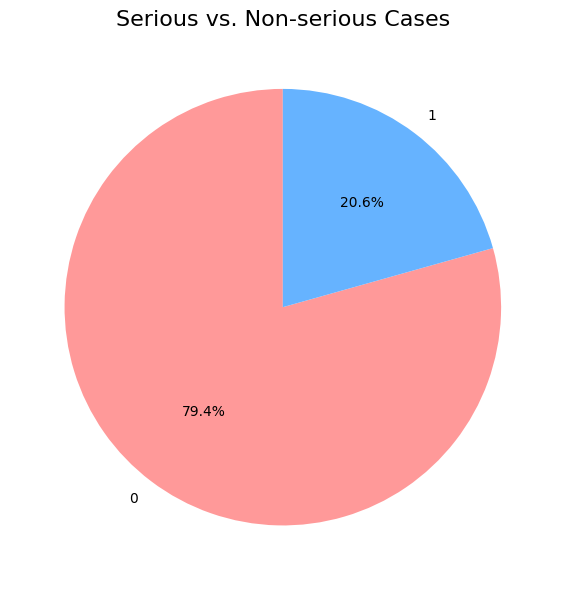

In [119]:
prr_df['signal']


plt.figure(figsize=(8, 6))
serious_counts = prr_df['signal'].value_counts()
plt.pie(serious_counts, labels=serious_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'])
plt.title('Serious vs. Non-serious Cases', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


In [28]:
clean_drug = pd.read_csv("../../data/clean_drug.csv")

clean_drug.head()

,safetyreportid,medicinal_product,medicinal_product_clean
0,25129349,FLECAINIDE,flecainide
1,25129349,PROPRANOLOL,propranolol
2,25129367,ESMOLOL,esmolol
3,25129367,SOTALOL HYDROCHLORIDE,sotalol
4,25129367,PROPRANOLOL,propranolol


In [29]:
clean_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881396 entries, 0 to 881395
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   safetyreportid           881396 non-null  object
 1   medicinal_product        881396 non-null  object
 2   medicinal_product_clean  880837 non-null  object
dtypes: object(3)
memory usage: 20.2+ MB


In [30]:
print(clean_drug['medicinal_product'].nunique())
print(clean_drug['medicinal_product_clean'].nunique())

16536
6699


In [31]:
print(clean_drug['medicinal_product'].dropna().nunique())

16536


In [32]:
clean_drug.loc[clean_drug['medicinal_product_clean'] == 'UNKNOWN']

,safetyreportid,medicinal_product,medicinal_product_clean


In [33]:
clean_drug.loc[clean_drug['medicinal_product_clean'] != 'UNKNOWN']

,safetyreportid,medicinal_product,medicinal_product_clean
0,25129349,FLECAINIDE,flecainide
1,25129349,PROPRANOLOL,propranolol
2,25129367,ESMOLOL,esmolol
3,25129367,SOTALOL HYDROCHLORIDE,sotalol
4,25129367,PROPRANOLOL,propranolol
...,...,...,...
881391,8651696,EXTAVIA,interferon beta-1b
881392,8651696,EXTAVIA,interferon beta-1b
881393,8651696,EXTAVIA,interferon beta-1b
881394,8651812,ANTIBIOTICS,antibiotics


In [34]:
drug = pd.read_csv("../../data/drug_clean_search.csv")

drug.head()

,medicinal_product_clean
0,NaN
1,aclarubicin
2,*peg-asparaginase unknown
3,.
4,0.0024mol/l


In [59]:
drug[drug['medicinal_product_clean'] == '.']

,medicinal_product_clean
3,.


In [35]:
drug.nunique()

medicinal_product_clean    6699
dtype: int64

In [36]:
ped_new = pd.read_csv("../../data/ped_data_new.csv.gz", compression='gzip', index_col=0)

ped_new.head()

,patient_custom_master_age,patient_custom_master_age_unit,patient_onsetage,patient_onsetageunit,patient_sex,safetyreportid,nichd,ich_ema,fda,lastupdate_date,...,reporter_company,reporter_country,reporter_qualification,drug_administration,drug_characterization,drug_indication,medicinal_product,reaction_meddrapt,reaction_outcome,medicinal_product_clean
0,0.500000,Year,6.0,Month,Female,25129349,infancy,infants_and_toddlers,infants,2025-04-09,...,ES-AEMPS-1647130,ES,Physician,Oral,Suspect (the drug was considered by the report...,Supraventricular tachycardia,FLECAINIDE,Bundle branch block right,Recovered/resolved,flecainide
1,0.500000,Year,6.0,Month,Female,25129349,infancy,infants_and_toddlers,infants,2025-04-09,...,ES-AEMPS-1647130,ES,Physician,Oral,Concomitant (the drug was reported as being ta...,Supraventricular tachycardia,PROPRANOLOL,Bundle branch block right,Recovered/resolved,propranolol
2,0.013699,Year,5.0,Day,Unknown,25129367,term_neonatal,term_newborn_infants,neonates,2025-04-09,...,US-AUROBINDO-AUR-APL-2025-015649,US,Other health professional,Unknown,Suspect (the drug was considered by the report...,Supraventricular tachycardia,ESMOLOL,Treatment failure,Unknown,esmolol
3,0.013699,Year,5.0,Day,Unknown,25129367,term_neonatal,term_newborn_infants,neonates,2025-04-09,...,US-AUROBINDO-AUR-APL-2025-015649,US,Other health professional,Unknown,Suspect (the drug was considered by the report...,Supraventricular tachycardia,SOTALOL HYDROCHLORIDE,Treatment failure,Unknown,sotalol
4,0.013699,Year,5.0,Day,Unknown,25129367,term_neonatal,term_newborn_infants,neonates,2025-04-09,...,US-AUROBINDO-AUR-APL-2025-015649,US,Other health professional,Unknown,Suspect (the drug was considered by the report...,Supraventricular tachycardia,PROPRANOLOL,Treatment failure,Unknown,propranolol


In [45]:
ped_new['medicinal_product_clean'].nunique()

6699

In [63]:
ped_new.loc[ped_new['medicinal_product_clean'] == 'cy', ['medicinal_product','medicinal_product_clean']]

,medicinal_product,medicinal_product_clean
359968,CY,cy
359969,CY,cy
359970,CY,cy


In [38]:
ped_new['medicinal_product'].nunique()


16536

In [39]:
ped_new[['medicinal_product','medicinal_product_clean']]

,medicinal_product,medicinal_product_clean
0,FLECAINIDE,flecainide
1,PROPRANOLOL,propranolol
2,ESMOLOL,esmolol
3,SOTALOL HYDROCHLORIDE,sotalol
4,PROPRANOLOL,propranolol
...,...,...
881391,EXTAVIA,interferon beta-1b
881392,EXTAVIA,interferon beta-1b
881393,EXTAVIA,interferon beta-1b
881394,ANTIBIOTICS,antibiotics


In [40]:
clean_drug = pd.read_csv("../../data/clean_drug.csv")

# กลุ่มชื่อดิบที่ถูกรวม (มี raw > 1 ต่อชื่อ clean)
dup_map = (clean_drug
           .groupby("medicinal_product_clean")["medicinal_product"]
           .agg(["nunique", lambda x: sorted(x.unique())])
           .rename(columns={"nunique": "raw_count", "<lambda_0>": "raw_variants"})
           .query("raw_count > 1")
           .sort_values("raw_count", ascending=False))

print("🗒️  ชื่อมาตรฐานที่มีชื่อดิบหลายแบบจับรวม:")
print(dup_map.head(10))


🗒️  ชื่อมาตรฐานที่มีชื่อดิบหลายแบบจับรวม:
                         raw_count  \
medicinal_product_clean              
acetaminophen                  203   
ibuprofen                      118   
somatropin                      96   
dextromethorphan                76   
diphenhydramine                 74   
insulin                         68   
dexamethasone                   68   
methylphenidate                 66   
paracetamol                     60   
amphetamine                     55   

                                                              raw_variants  
medicinal_product_clean                                                     
acetaminophen            [ACETAMINOPHEN, ACETAMINOPHEN   NON ASPIRIN PA...  
ibuprofen                [ADVIL, ADVIL                   (IBUPROFEN, UN...  
somatropin               [COROTROPE, GENOTONORM, GENOTONORM (SOMATROPIN...  
dextromethorphan         [ANTITUSSIVE, BENYLIN, BENYLIN DM 12 HOUR SYRU...  
diphenhydramine          [BANOPHEN MAJO

In [41]:
dup_map

,raw_count,raw_variants
medicinal_product_clean,,
acetaminophen,203,"[ACETAMINOPHEN, ACETAMINOPHEN NON ASPIRIN PA..."
ibuprofen,118,"[ADVIL, ADVIL (IBUPROFEN, UN..."
somatropin,96,"[COROTROPE, GENOTONORM, GENOTONORM (SOMATROPIN..."
dextromethorphan,76,"[ANTITUSSIVE, BENYLIN, BENYLIN DM 12 HOUR SYRU..."
diphenhydramine,74,"[BANOPHEN MAJOR, BENADRYL, BENADRYL ..."
...,...,...
xolair,2,"[XOLAIR, XOLAIR PFS]"
"acetaminophen, dextromethorphan",2,[EQUATE DAYTIME COLD AND FLU ACETAMIN. 325MG D...
"acetaminophen, caffeine",2,[EXCEDRIN QUICKTAB (NCH) (ACETAMINOPHEN (PARAC...


In [42]:
dup_map.to_csv("../../data/deduplicated_name_mapping.csv")
print("mapping list saved to deduplicated_name_mapping.csv")


mapping list saved to deduplicated_name_mapping.csv


In [93]:
clean_drug_v2 = pd.read_csv("../../data/v2/clean_drug_v2.csv")

clean_drug_v2

,safetyreportid,medicinal_product,medicinal_product_clean
0,25129349,FLECAINIDE,flecainide
1,25129349,PROPRANOLOL,propranolol
2,25129367,ESMOLOL,esmolol
3,25129367,SOTALOL HYDROCHLORIDE,sotalol
4,25129367,PROPRANOLOL,propranolol
...,...,...,...
881391,8651696,EXTAVIA,interferon beta-1b
881392,8651696,EXTAVIA,interferon beta-1b
881393,8651696,EXTAVIA,interferon beta-1b
881394,8651812,ANTIBIOTICS,antibiotics


In [94]:
clean_drug_v2.isna().sum()

safetyreportid                 0
medicinal_product              0
medicinal_product_clean    37436
dtype: int64

In [104]:
clean_drug_v2.loc[clean_drug_v2['medicinal_product_clean'].isna(), ['medicinal_product','medicinal_product_clean']]

,medicinal_product,medicinal_product_clean
632,UNSPECIFIED INGREDIENT,NaN
633,UNSPECIFIED INGREDIENT,NaN
634,UNSPECIFIED INGREDIENT,NaN
635,UNSPECIFIED INGREDIENT,NaN
636,UNSPECIFIED INGREDIENT,NaN
...,...,...
881186,EXJADE,NaN
881187,EXJADE,NaN
881188,EXJADE,NaN
881189,EXJADE,NaN


In [105]:
dup_map_v2 = (clean_drug_v2
           .groupby("medicinal_product_clean")["medicinal_product"]
           .agg(["nunique", lambda x: sorted(x.unique())])
           .rename(columns={"nunique": "raw_count", "<lambda_0>": "raw_variants"})
           .query("raw_count > 1")
           .sort_values("raw_count", ascending=False))

print("🗒️  ชื่อมาตรฐานที่มีชื่อดิบหลายแบบจับรวม:")
print(dup_map_v2.head(10))

🗒️  ชื่อมาตรฐานที่มีชื่อดิบหลายแบบจับรวม:
                         raw_count  \
medicinal_product_clean              
acetaminophen                  266   
ibuprofen                      123   
somatropin                     105   
diphenhydramine                 92   
dextromethorphan                81   
methylphenidate                 79   
dexamethasone                   76   
paracetamol                     68   
methotrexate                    57   
tacrolimus                      52   

                                                              raw_variants  
medicinal_product_clean                                                     
acetaminophen            [593A SARNA SENSITIVE LOTION (PRAMOXINE HYDROC...  
ibuprofen                [ABILIFY TABS 20 MG, ADVIL, ADVIL             ...  
somatropin               [ARIPIPRAZOLE (ARIPIPRAZOLE), CARISPODOL, CORI...  
diphenhydramine          [ALLER-TEC 10MG KIRKLAND/COSTCO, ALLERGIN, AMP...  
dextromethorphan         [44 COUGH RELI

In [106]:
dup_map

,raw_count,raw_variants
medicinal_product_clean,,
acetaminophen,203,"[ACETAMINOPHEN, ACETAMINOPHEN NON ASPIRIN PA..."
ibuprofen,118,"[ADVIL, ADVIL (IBUPROFEN, UN..."
somatropin,96,"[COROTROPE, GENOTONORM, GENOTONORM (SOMATROPIN..."
dextromethorphan,76,"[ANTITUSSIVE, BENYLIN, BENYLIN DM 12 HOUR SYRU..."
diphenhydramine,74,"[BANOPHEN MAJOR, BENADRYL, BENADRYL ..."
...,...,...
xolair,2,"[XOLAIR, XOLAIR PFS]"
"acetaminophen, dextromethorphan",2,[EQUATE DAYTIME COLD AND FLU ACETAMIN. 325MG D...
"acetaminophen, caffeine",2,[EXCEDRIN QUICKTAB (NCH) (ACETAMINOPHEN (PARAC...


In [107]:
dup_map_v2

,raw_count,raw_variants
medicinal_product_clean,,
acetaminophen,266,[593A SARNA SENSITIVE LOTION (PRAMOXINE HYDROC...
ibuprofen,123,"[ABILIFY TABS 20 MG, ADVIL, ADVIL ..."
somatropin,105,"[ARIPIPRAZOLE (ARIPIPRAZOLE), CARISPODOL, CORI..."
diphenhydramine,92,"[ALLER-TEC 10MG KIRKLAND/COSTCO, ALLERGIN, AMP..."
dextromethorphan,81,[44 COUGH RELIEF SYRUP CHERRY FLAVOR (ETHANOL ...
...,...,...
norfloxacin,2,"[METHYLPHYENIDATE HCL, NOROXIN]"
"norethindrone,ethinyl estradiol,ferrous fumarate",2,[CODEINE PHOSPHATE (NGX) (CODEINE PH...
"norelgestromin,ethinyl estradiol",2,"[ACTRAPHANE HM PENSET, NOVORAPID PENFILL 3.0 ML]"


In [109]:
dup_map_v2.to_csv("../../data/v2/deduplicated_name_mapping_v2.csv")
print("mapping list saved to deduplicated_name_mapping_v2.csv")


mapping list saved to deduplicated_name_mapping_v2.csv


In [100]:
drug_v2 = pd.read_csv("../../data/v2/drug_clean_search_v2.csv")

drug_v2.head()

,medicinal_product_clean
0,03-okt
1,"3,4-methylenedioxyamphetamine"
2,"3,4-methylenedioxymethamphetamine"
3,5-aminosalicylic acid
4,5-fluorouracil


In [103]:
drug_v2['medicinal_product_clean'].nunique()

3709

In [110]:
# โหลด 2 ไฟล์
v1 = pd.read_csv("../../data/clean_drug.csv")
v2 = pd.read_csv("../../data/v2/clean_drug_v2.csv")

def rows_for(drug, df):
    df2 = df.assign(lst=df["medicinal_product_clean"].fillna("").str.split(r"\s*,\s*")
           ).explode("lst")
    return df2.loc[df2["lst"].str.lower()==drug]

# ❶ แถวที่ v2 บันทึก acetaminophen แต่ v1 ไม่
set_v2 = set(rows_for("acetaminophen", v2)["safetyreportid"])
set_v1 = set(rows_for("acetaminophen", v1)["safetyreportid"])

missing_ids = set_v2 - set_v1
print("รายงานที่ v1 พลาด:", len(missing_ids))

# ❷ ดูชื่อดิบของรายงานเหล่านั้น
sample = v1.loc[v1["safetyreportid"].isin(list(missing_ids)) ,
                "medicinal_product"].unique()[:15]
print(sample)


รายงานที่ v1 พลาด: 754
['DURAGESIC' 'ULTRACET' 'MIVACRON'
 'FEVERALL (ACETAMINOPHEN RECTAL SUPPOSITORIES), 80MG (ALPHARMA PHARMACE'
 'NORETHINDRONE ACETATE AND ETHINYL ESTRADIOL' 'SEROXAT' 'RADIATION'
 'THALOMID' 'SUDAFED 12 HOUR'
 "CHILDREN'S TYLENOL SUSPENSION (ACETAMINOPHEN) SUSPENSION" 'ALFENTANIL'
 'DARVON' 'IFX (IFOFAMIDE) POWDER, STERILE' 'ADRIAMYCIN PFS' 'VINCRISTINE']


In [120]:
prr_vec = pd.read_csv('../../data/labeled_drug_adr_data_vector.csv')

In [121]:
prr_vec

,drug_name,adr_name,DE,LT,HO,DS,CA,OT,label_serious
0,ANTICOAGULANT SODIUM CITRATE,Pain,0,0,0,0,0,0,0
1,ANTICOAGULANT SODIUM CITRATE,Nausea,0,0,0,0,0,0,0
2,FENSOLVI,Off label use,0,0,0,0,0,0,0
3,LACOSAMIDE,Drug ineffective,0,0,0,0,0,0,0
4,M-M-RVAXPRO,Pyrexia,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
216496,YAZ,Hypertension,0,0,1,0,0,1,1
216497,YAZ,Hypotension,0,0,1,0,0,1,1
216498,EXTAVIA,Weight decreased,0,0,0,0,0,1,1
216499,EXTAVIA,Abdominal pain,0,0,0,0,0,1,1


In [137]:
prr_vec[prr_vec['label_serious'] == 0]

,drug_name,adr_name,DE,LT,HO,DS,CA,OT,label_serious
0,ANTICOAGULANT SODIUM CITRATE,Pain,0,0,0,0,0,0,0
1,ANTICOAGULANT SODIUM CITRATE,Nausea,0,0,0,0,0,0,0
2,FENSOLVI,Off label use,0,0,0,0,0,0,0
3,LACOSAMIDE,Drug ineffective,0,0,0,0,0,0,0
6,LEVETIRACETAM,Drug ineffective,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
216473,CRESTOR,Off label use,0,0,0,0,0,0,0
216483,NUVIGIL,Off label use,0,0,0,0,0,0,0
216484,NUVIGIL,Headache,0,0,0,0,0,0,0
216485,NUVIGIL,Agitation,0,0,0,0,0,0,0


In [128]:
prr_vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216501 entries, 0 to 216500
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   drug_name      216501 non-null  object
 1   adr_name       216501 non-null  object
 2   DE             216501 non-null  int64 
 3   LT             216501 non-null  int64 
 4   HO             216501 non-null  int64 
 5   DS             216501 non-null  int64 
 6   CA             216501 non-null  int64 
 7   OT             216501 non-null  int64 
 8   label_serious  216501 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 14.9+ MB


In [122]:
prr_vec['label_serious'].value_counts()

label_serious
1    187629
0     28872
Name: count, dtype: int64

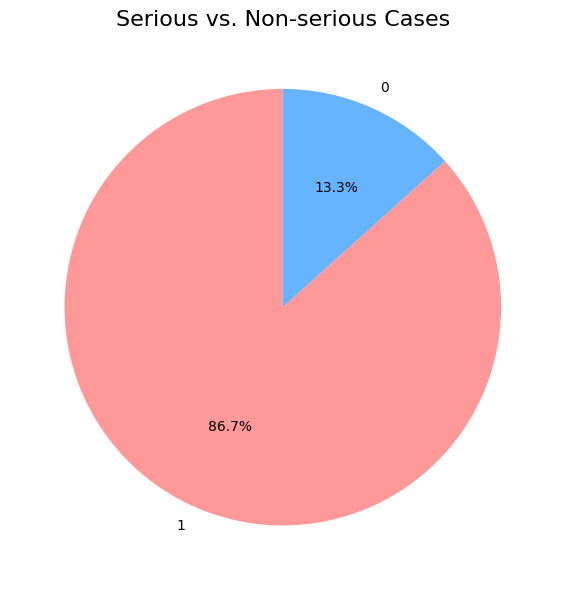

In [123]:
prr_vec['label_serious']


plt.figure(figsize=(8, 6))
serious_counts = prr_vec['label_serious'].value_counts()
plt.pie(serious_counts, labels=serious_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'])
plt.title('Serious vs. Non-serious Cases', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


In [125]:
import pandas as pd

outcome_cols = [
    'DE',
    'LT',
    'HO',
    'DS',
    'CA',
    'OT'
]

# -------------------------------
# 1)  นับเฉพาะ 1  (เหตุการณ์เกิดขึ้น)
# -------------------------------
positive_cnt = prr_vec[outcome_cols].sum()          # Series
print("จำนวนแถวที่เป็น 1:\n", positive_cnt)

# -------------------------------
# 2)  นับทั้ง 0 และ 1 ในตารางเดียว
# -------------------------------
counts_table = (
    prr_vec[outcome_cols]
    .apply(pd.Series.value_counts)   # → rows = 0,1
    .T                               # กลับ index เป็นชื่อคอลัมน์
    .fillna(0)
    .astype(int)
    .rename(columns={0: 'count_0', 1: 'count_1'})
)

print("ตารางสรุป 0/1 ต่อคอลัมน์\n", counts_table)

# -------------------------------
# 3)  ถ้าอยากคำนวณสัดส่วน %
# -------------------------------
counts_table['pct_1'] = counts_table['count_1'] / len(prr_vec) * 100
counts_table['pct_0'] = counts_table['count_0'] / len(prr_vec) * 100


จำนวนแถวที่เป็น 1:
 DE    36583
LT    29066
HO    92255
DS    12938
CA     3654
OT    90591
dtype: int64
ตารางสรุป 0/1 ต่อคอลัมน์
     count_0  count_1
DE   179918    36583
LT   187435    29066
HO   124246    92255
DS   203563    12938
CA   212847     3654
OT   125910    90591
